# Analysis of relationship between basketball courts and every day accidents

For my project I am using [Basketball Courts Data](https://www.data.act.gov.au/api/views/igti-4f4a/rows.csv) and [Bike Crash Data](https://www.data.act.gov.au/api/views/n2kg-qkwj/rows.csv)

In [62]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


In [ ]:
%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [ ]:
if os.path.isfile("Basketball_Courts.csv"):
    filepath = "Basketball_Courts.csv"
    print("loading from file")
else:
    filepath = "https://www.data.act.gov.au/api/views/igti-4f4a/rows.csv"
    print("loading from the internet")

basketball_data = pd.read_csv(filepath)
print("done")

loading from the internet
done


In [ ]:
if os.path.isfile("Cyclist_Crashes.csv"):
    filepath = "Cyclist_Crashes.csv"
    print("loading from file")
else:
    filepath = "https://www.data.act.gov.au/api/views/n2kg-qkwj/rows.csv"
    print("loading from the internet")

Cyclist_Crashes_data = pd.read_csv(filepath)
print("done")

loading from the internet
done


In [ ]:
basketball_data.head()

,ID,TYPE,DIVISION,LOCATION,IMAGE_LINK,VIDEO_LINK,LATITUDE,LONGITUDE,Location_1
0,Bskt45,Double Court,Wright,Porter Street Neighbourhood Park,NaN,NaN,-35.311400,149.028152,"(-35.3114, 149.028152)"
1,Bskt2,Single Court,Ainslie,Corroboree Park,NaN,NaN,-35.268338,149.141855,"(-35.268338, 149.141855)"
2,Bskt14,Single Court,Deakin,Lawley Street - Neighbourhood Park,NaN,NaN,-35.319147,149.100659,"(-35.319147, 149.100659)"
3,Bskt11,Single Court,Flynn,Blackwell Circuit Neighbourhood Park,NaN,NaN,-35.206624,149.038999,"(-35.206624, 149.038999)"
4,Bskt39,Single Court,Nicholls,Lyrebird Place Pedestrian Parkland,NaN,NaN,-35.193455,149.106676,"(-35.193455, 149.106676)"


In [ ]:
Cyclist_Crashes_data.head()

,CRASH_ID,CRASH_DATE,CRASH_TIME,SEVERITY,CRASH_TYPE,CYCLISTS,CYCLIST_CASUALTIES,REPORTED_LOCATION,LATITUDE,LONGITUDE,LOCATION_1
0,1212158,02 August 2019,12:00,Injury,Other - Vehicle to Vehicle,1,1,FAWKNER STREET (FARRER -> ELOUERA),-35.272927,149.135539,"(-35.272927, 149.135539)"
1,1212428,26 July 2019,18:20,Property Damage Only,Right angle collision,1,0,BATMAN/GOOREEN INTERSECTION,-35.275991,149.141070,"(-35.275991, 149.14107)"
2,1188323,15 July 2018,11:00,Property Damage Only,Right angle collision,1,0,COTTER/LADY DENMAN INTERSECTION,-35.312936,149.082802,"(-35.312936, 149.082802)"
3,1188459,19 July 2018,09:30,Property Damage Only,Same direction side swipe,1,0,ANTILL/MELBA INTERSECTION,-35.248800,149.142165,"(-35.2488, 149.142165)"
4,1221087,16 December 2019,07:24,Property Damage Only,Other - Vehicle to Vehicle,1,0,ANTILL/MOUAT/NORTHBOURNE INTERSECTION,-35.248235,149.134223,"(-35.248235, 149.134223)"


In [ ]:
basketball_data.columns

Index(['ID', 'TYPE', 'DIVISION', 'LOCATION', 'IMAGE_LINK', 'VIDEO_LINK',
       'LATITUDE', 'LONGITUDE', 'Location_1'],
      dtype='object')

In [ ]:
row_one = basketball_data.iloc[1]
row_one

ID                               Bskt2
TYPE                      Single Court
DIVISION                       Ainslie
LOCATION               Corroboree Park
IMAGE_LINK                         NaN
VIDEO_LINK                         NaN
LATITUDE                    -35.268338
LONGITUDE                   149.141855
Location_1    (-35.268338, 149.141855)
Name: 1, dtype: object

In [ ]:
row_one = Cyclist_Crashes_data.iloc[1]
row_one

CRASH_ID                                  1212428
CRASH_DATE                           26 July 2019
CRASH_TIME                                  18:20
SEVERITY                     Property Damage Only
CRASH_TYPE                  Right angle collision
CYCLISTS                                        1
CYCLIST_CASUALTIES                              0
REPORTED_LOCATION     BATMAN/GOOREEN INTERSECTION
LATITUDE                               -35.275991
LONGITUDE                               149.14107
LOCATION_1                (-35.275991, 149.14107)
Name: 1, dtype: object

In [ ]:
row_one.DIVISION

,ID,TYPE,DIVISION,LOCATION,IMAGE_LINK,VIDEO_LINK,LATITUDE,LONGITUDE,Location_1
0,Bskt45,Double Court,Wright,Porter Street Neighbourhood Park,NaN,NaN,-35.311400,149.028152,"(-35.3114, 149.028152)"
1,Bskt2,Single Court,Ainslie,Corroboree Park,NaN,NaN,-35.268338,149.141855,"(-35.268338, 149.141855)"
2,Bskt14,Single Court,Deakin,Lawley Street - Neighbourhood Park,NaN,NaN,-35.319147,149.100659,"(-35.319147, 149.100659)"
3,Bskt11,Single Court,Flynn,Blackwell Circuit Neighbourhood Park,NaN,NaN,-35.206624,149.038999,"(-35.206624, 149.038999)"
4,Bskt39,Single Court,Nicholls,Lyrebird Place Pedestrian Parkland,NaN,NaN,-35.193455,149.106676,"(-35.193455, 149.106676)"
5,Bskt10,4 Way Hoop,Lyons,Devonport Street - Neighbourhood Park,NaN,NaN,-35.336639,149.073916,"(-35.336639, 149.073916)"
6,Bskt40,Half Court,Chisholm,Alston Street Neighbourhood Park,NaN,NaN,-35.421280,149.122054,"(-35.42128, 149.122054)"
7,Bskt25,Single Court,Macarthur,Hawkesworth Place - Neighbourhood Park,NaN,NaN,-35.408123,149.129002,"(-35.408123, 149.129002)"
8,Bskt5,Half Court,Greenway,Lake Tuggeranong District Park,NaN,NaN,-35.402904,149.071724,"(-35.402904, 149.071724)"
9,Bskt8,4 Way Hoop,Kambah,Rundle Place - Neighbourhood Park,NaN,NaN,-35.372251,149.062246,"(-35.372251, 149.062246)"


Text(0, 0.5, 'Longitude')

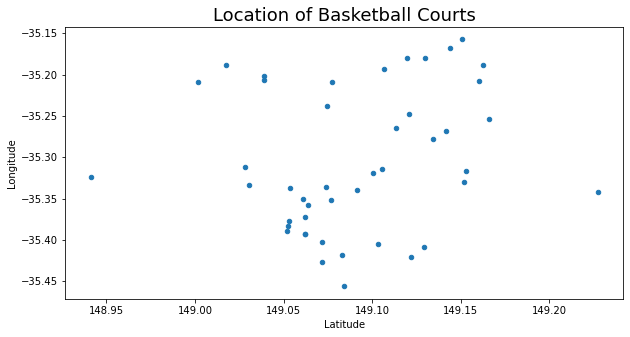

In [ ]:
basketball_data.plot.scatter("LONGITUDE", "LATITUDE")

plt.title("Location of Basketball Courts", fontsize=18)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Longitude", fontsize=10)

This scatterplot shows the location of all basketball courts in the A.C.T.

Text(0, 0.5, 'Longtitude')

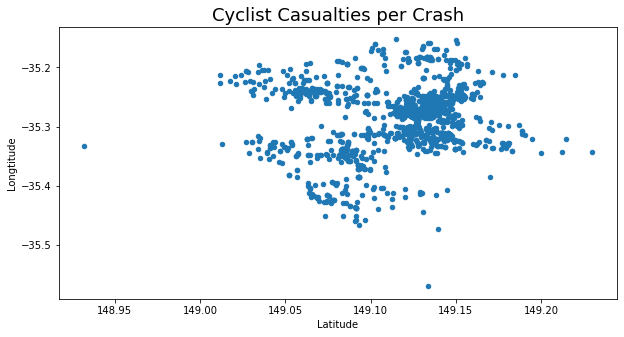

In [ ]:
Cyclist_Crashes_data.plot.scatter("LONGITUDE", "LATITUDE")

plt.title("Cyclist Casualties per Crash", fontsize=18)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Longtitude", fontsize=10)

This scatterplot shows the location of where cyclist crashes have occured from 4th January 2012 to the 3rd October 2020.

This scatterplot is also clustered in the same areas where basketball courts are which shows a relationship between basketball courts and cyclist crashes.

After seeing this commonality between the two scatter plots I was curious to see the severity of these cyclist crashes so I looked into their casualties

Text(0, 0.5, 'Number of Cyclists Involed')

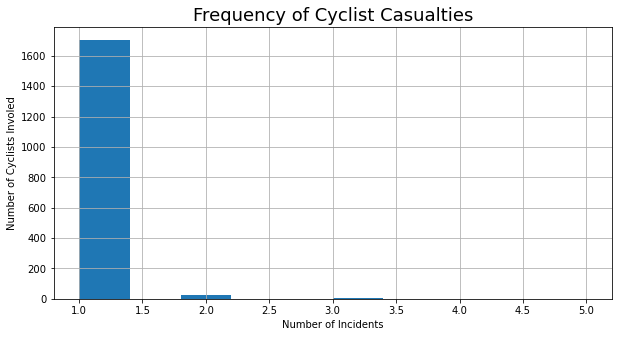

In [65]:
Cyclist_Crashes_data["CYCLISTS"].hist()

plt.title("Frequency of Cyclist Casualties", fontsize=18)
plt.xlabel("Number of Incidents", fontsize=10)
plt.ylabel("Number of Cyclists Involed", fontsize=10)

This graphs shows many cyclists were involed in each incident.

1 is the most common because it's usally one person riding a book which explains why 2 and 3 seater bikes have less incidents. 

Text(0, 0.5, 'Number of Cyclists Involed')

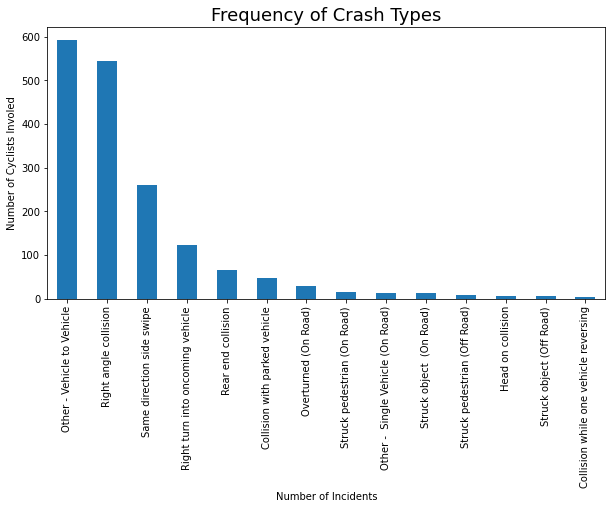

In [99]:
CRASH_TYPE = Cyclist_Crashes_data["CRASH_TYPE"].value_counts()
CRASH_TYPE[CRASH_TYPE >= 3].plot(kind="bar")

plt.title("Frequency of Crash Types", fontsize=18)
plt.xlabel("Number of Incidents", fontsize=10)
plt.ylabel("Number of Cyclists Involed", fontsize=10)

This graph shows which type of crashes have occured the most.

With cyclist to cylist to crashes happening the most.

Text(0, 0.5, 'Number of Casualties')

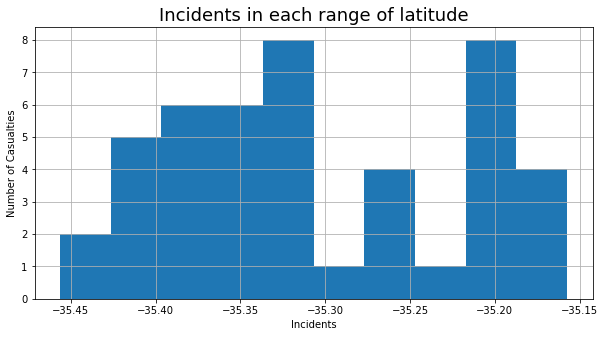

In [ ]:
basketball_data["LATITUDE"].hist()

plt.title("Incidents in each range of latitude", fontsize=18)
plt.xlabel("Incidents", fontsize=10)
plt.ylabel("Number of Casualties", fontsize=10)

Text(0, 0.5, 'Number of Casualties')

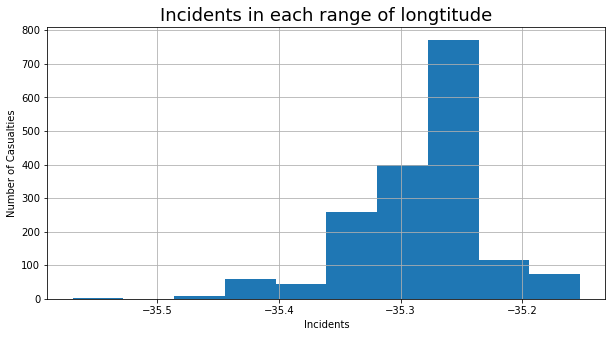

In [ ]:
Cyclist_Crashes_data["LATITUDE"].hist()

plt.title("Incidents in each range of longtitude", fontsize=18)
plt.xlabel("Incidents", fontsize=10)
plt.ylabel("Number of Casualties", fontsize=10)

Text(0, 0.5, 'Number of Casualties')

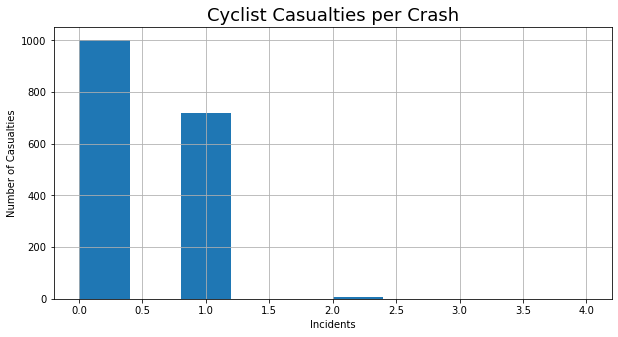

In [ ]:
Cyclist_Crashes_data["CYCLIST_CASUALTIES"].hist()

plt.title("Cyclist Casualties per Crash", fontsize=18)
plt.xlabel("Incidents", fontsize=10)
plt.ylabel("Number of Casualties", fontsize=10)

This graph shows that most cyclist crashes usuallly involve 1 or less person and that it'll be rare to involve 2 casualties.

In [ ]:
Cyclist_Crashes_data.groupby(pd.Grouper(key="CRASH_DATE")).mean()

,CRASH_ID,CYCLISTS,CYCLIST_CASUALTIES,LATITUDE,LONGITUDE
CRASH_DATE,,,,,
02 August 2019,1212158.0,1.0,1.0,-35.272927,149.135539
26 July 2019,1212104.5,1.0,0.5,-35.272886,149.133298
15 July 2018,1188323.0,1.0,0.0,-35.312936,149.082802
19 July 2018,1188961.0,1.0,0.0,-35.263355,149.135571
16 December 2019,1221090.0,1.0,0.0,-35.261346,149.133405
...,...,...,...,...,...
22 June 2018,1187118.0,1.0,0.5,-35.255578,149.137340
27 June 2018,1186930.0,1.0,1.0,-35.218244,149.130995
19 June 2018,1187169.0,1.0,0.0,-35.260263,149.130629


<AxesSubplot:>

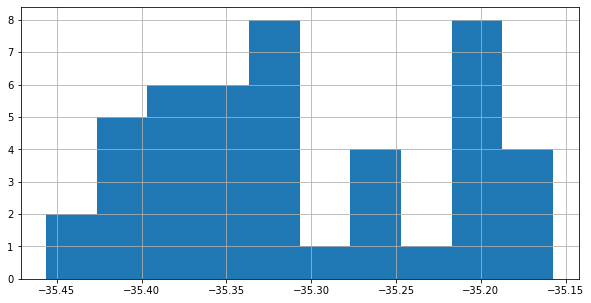

In [ ]:
basketball_data.LATITUDE[basketball_data.LATITUDE < 149.10].hist() 

Number of Courts that are on the left half of ACT

<AxesSubplot:>

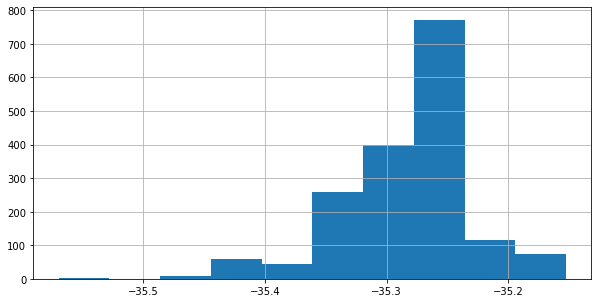

In [ ]:
Cyclist_Crashes_data.LATITUDE[Cyclist_Crashes_data.LATITUDE < 149.10].hist() 

Number of Cyclist Crashes that have occured on the left half of the ACT

<AxesSubplot:>

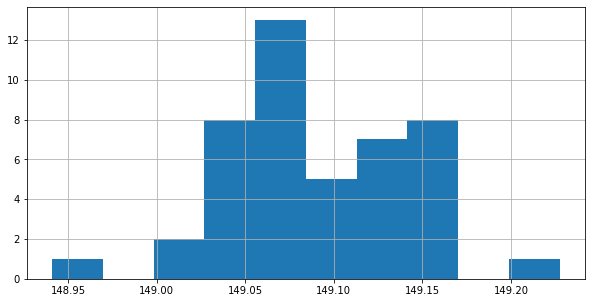

In [ ]:
basketball_data["LONGITUDE"][basketball_data["LATITUDE"] < -30].hist()

<AxesSubplot:>

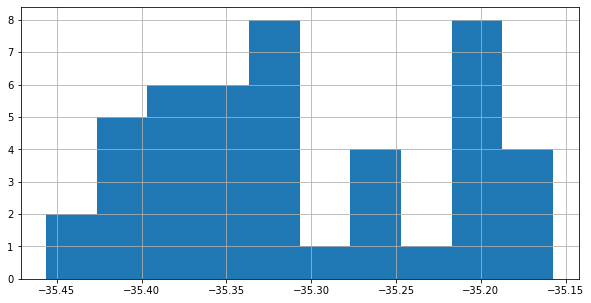

In [ ]:
basketball_data["LATITUDE"][basketball_data["LATITUDE"] < -20].hist()